<a href="https://colab.research.google.com/github/Pooja-ghode09/decision-tree-classifier/blob/main/assement5_1decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Customers.csv'

In [5]:
df = pd.read_csv(file_path)

In [7]:
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [8]:
df['Purchase'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

In [9]:
features = ['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size']
X = df[features]
y = df['Purchase']

In [10]:
X = pd.get_dummies(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.48


In [16]:
importances = model.feature_importances_
feature_names = X.columns

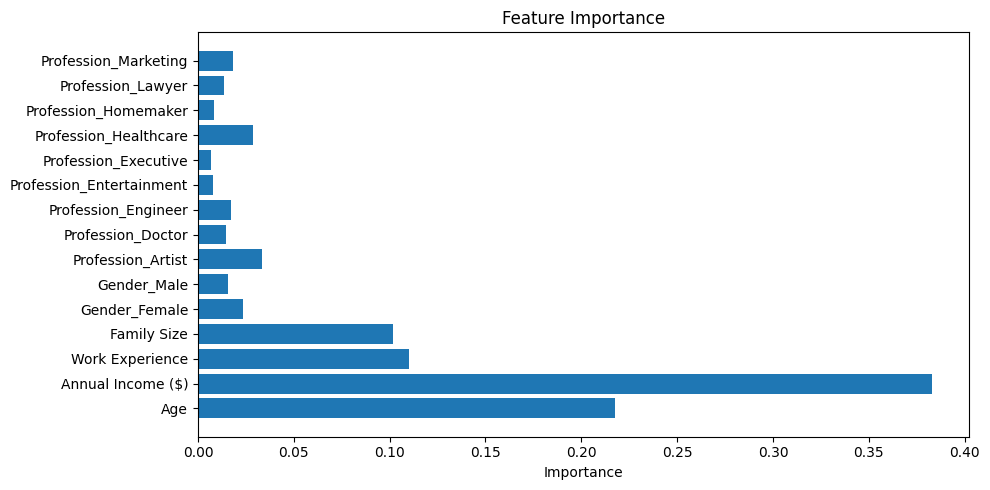

In [17]:
plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()